# Check Subtree:

- `T1` and `T2` are two very large binary trees, with `T1` much bigger than `T2`.
- Create an algorithm to determine if `T2` is a subtree of `T1`.
- A tree `T2` is a subtree of `T1` if there exists a node `n` in `T1` such that the subtree of `n` is identical to `T2`.
- That is, if you cut off the tree at node `n`, the two trees would be identical.


T1:


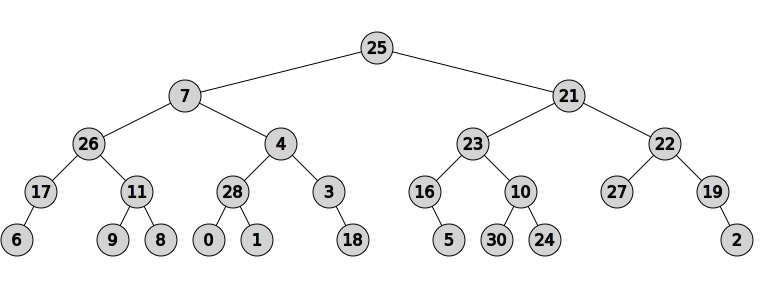

T2:


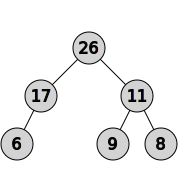

In [84]:
from binarytree import tree, Node

root1 = tree(height=4)
root2 = root1.left.left

print("T1:")
display(root1)
print("T2:")
display(root2)

In [92]:
import pytest
import ipytest
ipytest.autoconfig()

In [90]:
from collections import deque

import binarytree

In [136]:
%%ipytest
from typing import Generator

from binarytree import Node


def get_tree_values(root: Node, null_value: int = -1) -> Generator[int, None, None]:
    # TODO: Docstring
    to_visit = deque([root])
    while to_visit:
        node = to_visit.popleft()

        if node:
            yield node.value
            to_visit.append(node.left)
            to_visit.append(node.right)
        else:
            yield null_value


def test_get_tree_values():
    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    assert list(get_tree_values(root)) == [1, 2,  3, -1, -1, -1, -1]
    assert list(get_tree_values(root.left)) == [2, -1, -1]


.                                                                                            [100%]
1 passed in 0.02s


In [137]:
%%ipytest
from typing import Generator

from binarytree import Node


def find_nodes_by_value(value: int, under: Node) -> Generator[Node, None, None]:
    """Finds the nodes that match a given value.
    
    Args:
        value: An integer.
        under: A Node under which we will search for the value.
    Returns:
        A node with the given value, or None if the value is not found.
    """
    to_visit = deque([under])
    while to_visit:
        node = to_visit.popleft()

        if node.value == value:
            yield node

        if node.left:
            to_visit.append(node.left)    
        if node.right:
            to_visit.append(node.right)
    return None


def test_find_nodes_by_value():
    root = Node(1)
    root.left = Node(2)
    root.right = n3_1 = Node(3)
    root.left.right = n3_2 = Node(3)
    
    
    result = find_nodes_by_value(3, under=root)
    assert list(result) == [n3_1, n3_2]

.                                                                                            [100%]
1 passed in 0.03s


In [139]:
%%ipytest
from itertools import zip_longest

from binarytree import Node, tree, build


def are_trees_equal(root1: Node, root2: Node) -> bool:
    # TODO Docstring
    values1 = get_tree_values(root1)
    values2 = get_tree_values(root2)
    for value1, value2 in zip_longest(values1, values2):
        if value1 != value2:
            return False
    return True


def test_are_trees_equal():
    t1 = tree(height=5)
    t2 = build(t1.values)
    assert are_trees_equal(t1, t2)

    t2.right = Node(-1)
    assert not are_trees_equal(t1, t2)

    # Same values, different structure
    t1 = Node(1)
    t1.left = Node(2)
    t2 = Node(1)
    t2.right = Node(2)
    assert not are_trees_equal(t1, t2)


.                                                                                            [100%]
1 passed in 0.01s


In [140]:
%%ipytest
from binarytree import Node, tree, build

# Worst case O(N1 + k * N2) where k is the # of times T2 root's value appears in T1
def is_subtree(root1: Node, root2: Node) -> bool:
    """Checks if the tree under root2 is a subtree of the tree under root1.
    # TODO: Add Args and Returns.
    """
    for subtree_of_root1 in find_nodes_by_value(root2.value, under=root1):  # O(N1) where N1 is the size of T1
        if are_trees_equal(subtree_of_root1, root2):  # O(N2) where N2 is the size of T2 (smaller than T1)
            return True
    return False


def test_is_subtree():
    t1 = tree(height=5)
    t2 = build(t1.left.right.values)  # Might fail if no left-right node
    assert is_subtree(t1, t2)

    t2.left.value = -1
    assert not is_subtree(t1, t2)

.                                                                                            [100%]
1 passed in 0.04s


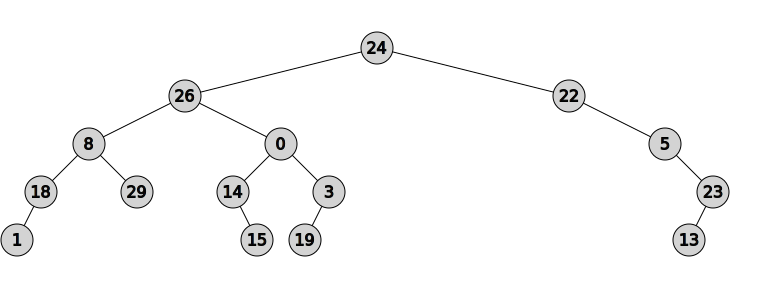

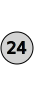

False

In [141]:
####

root1 = tree(height=4)
root2 = Node(root1.value)

display(root1)
display(root2)

is_subtree(root1, root2)

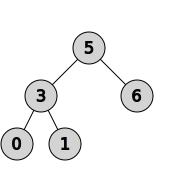

In [ ]:
# from collections import dequej
# from typing import Generator


# def traverse_together(root1: Node, root2: Node) -> Generator[tuple[Optional[int], Optional[int]], None, None]:
#     # TODO Docstring
#     to_visit_1 = deque([root1])
#     to_visit_2 = deque([root2])

#     while to_visit_1 or to_visit_2:
#         node1 = to_visit_1.popleft()
#         node2 = to_visit_2.popleft()

#         yield node1 and node1.value, node2 and node2.value

#         if node1 is None or node2 is None:
#             break

#         to_visit_1.append(node1.left)
#         to_visit_1.append(node1.right)
#         to_visit_2.append(node2.left)
#         to_visit_2.append(node2.right)


t1 = tree(height=2)
display(t1)